
<center> 
    
# Spotify: What Makes A Top Song?
    
    
    
<center> 
DigHum 100 Dr. Anderson | Gloria Yang | June 3, 2021

# A. Project Description

I've noticed that features of the most popular songs have changed a lot over the decades. While there are influences and consistencies in popular song attributes from the 20th century, the 21st century brought up new genres and styles of music. Modernization has led to different approaches and greater diversity of sounds such as louder sounds, faster tempos, and speechiness. In this project, I will be analyzing the popular songs on Spotify over time and looking for common attributes and trends.  

# B. Questions for Exploratory Data Analysis

1. Can we predict a song's popularity based on  attributes such as danceability, valence, loudness, and length?

2. Are there any trends in the popularity of different music genres?

3. How do song attributes differ according to different genres?

4. How have the attributes of songs that appear on Spotify's Top 2000 List changed over time?

# C. DataSet

I will be using “Spotify: All Time Top 2000 Mega Dataset”, a dataset taken from Kaggle which contains audio statistics and attributes for Spotify's top songs. The dataset is contained within a csv file and includes data on 1995 songs released from 1959 to 2019. The data set breaks down each song by the following attributes: genre, year, BPM, energy, danceability, loudness, liveness, valence, length, acousticness, speechiness, and popularity.


Link to dataset: https://drive.google.com/file/d/16BOmSQKc0WRAMaaHU9TBXTGERMbiz2uI/view?usp=sharing

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

plt.rcParams['figure.figsize'] = [12, 8]

Now, we will be importing the datset: 

In [27]:
songs = pd.read_csv('/content/drive/MyDrive/Spotify-2000.csv')
songs.head(5)

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
3,4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59


##D. Tools, Visualizations, and Results

Heatmaps are a data visualization technique that is used to show the magnitude of a phenomenon. I've created a heatmap to see if there are any correlations between song elements regarding popular songs. 

Text(0.5, 1.0, 'Correlation between Song Elements')

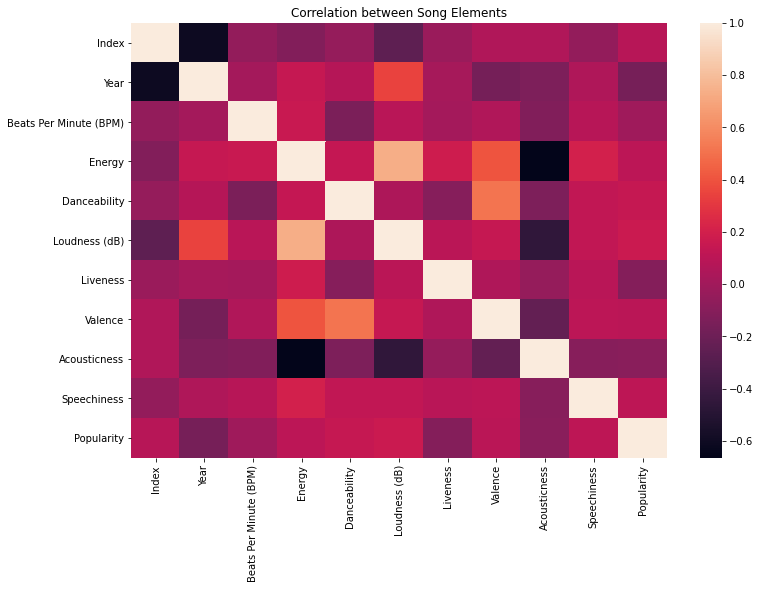

In [28]:
sns.heatmap(songs.corr())
plt.title('Correlation between Song Elements')

From the heatmap, I can immediately see a clear correlation between a song's loudness (dB) and a song's energy. 

I developed a scatter plot for the dataset's loudness and energy columns, which showed a strong positive correlation between loudness and energy. Energy is represented on a scale from 0 to 100; the more energetic a song, the more likely to the song is to feel loud and fast. 

Text(0.5, 1.0, 'Loudness vs Energy for the Top 2000 Songs on Spotify')

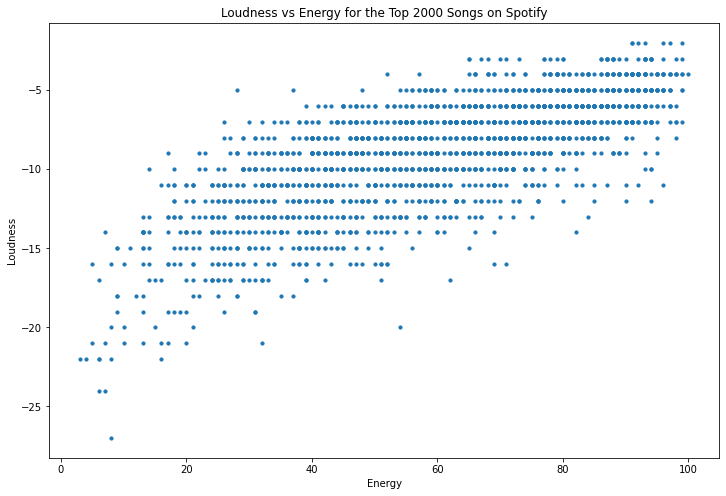

In [29]:
#Plot a scatter plot for energy vs loudness in the dataset
plt.scatter(songs['Energy'],songs['Loudness (dB)'],10)
plt.ylabel('Loudness')
plt.xlabel('Energy')
plt.title('Loudness vs Energy for the Top 2000 Songs on Spotify')

I then tried exploring to see if there were ideal length and BPMs for a popular song. 

1) For ideal length, I converted the dataset's length column from string to float values and developed a histogram to see length distribution. I removed outlier values from the dataset which included songs with a length of over 7 minutes. 

Text(0, 0.5, 'Song Length(min)')

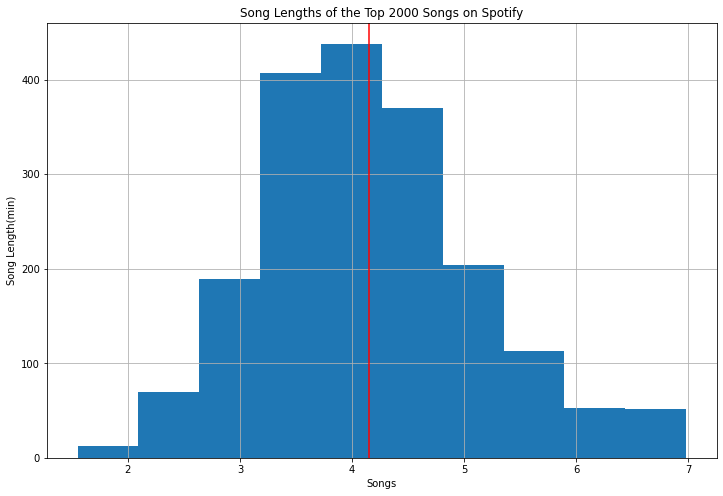

In [30]:
songs['Length(min)'] = songs['Length (Duration)'].str.replace(',','').astype(float)/60
songLengths = songs[songs['Length(min)']<7]

#Plot a histogram for song length distribution
songLengths.hist(column='Length(min)')
#Display the mean song length
plt.axvline(x=songLengths['Length(min)'].mean(),color='red')
plt.title('Song Lengths of the Top 2000 Songs on Spotify')
plt.xlabel('Songs')
plt.ylabel('Song Length(min)')
#songLengths['Length(min)'].mean()

The majority of popular songs appear to be between 3 and 5 minutes, with the ideal song at 4.15 minutes. 

2) For ideal BPM, I removed outlier values from the original dataset which included songs with BPMs over 190 and below 50. 

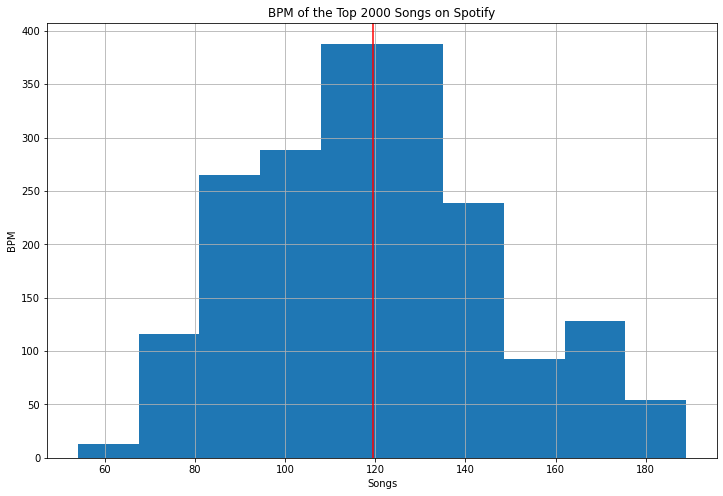

In [31]:
songBPMs = songs[songs['Beats Per Minute (BPM)']<190]
songBPMs = songBPMs[songBPMs['Beats Per Minute (BPM)']>50]

#Plot a histogram for BPM distribution
songBPMs.hist(column='Beats Per Minute (BPM)')
plt.title('BPM of the Top 2000 Songs on Spotify')
plt.xlabel('Songs')
plt.ylabel('BPM')
#Display the mean BPM
plt.axvline(x=songBPMs['Beats Per Minute (BPM)'].mean(),color='red')

It appears that popular songs have a more varied BPM distribution with the average BPM at approximately 120.  

I noticed that many of the top genres were indicated as subgenres or genres that included the artist's country of origin. I thus filtered subgenres from the dataset to broader genres: indie, rock, pop, alternative, country, hip pop, folk, soul, electronic, metal, funk, and other. 

In [32]:
def filterGenre(genre):
  # filters the song's listed subgenres into its main genre
  if re.search('indie',genre):
    return 'indie'  
  if re.search('rock',genre):
    return 'rock'
  if re.search('pop',genre):
    return 'pop'
  if re.search('adult standards',genre):
    return genre
  if re.search('alternative',genre):
    return 'alternative'
  if re.search('country',genre):
    return 'country'
  if re.search('hip hop',genre):
    return 'hip pop'
  if re.search('folk',genre):
    return 'folk'
  if re.search('soul',genre):
    return 'soul'
  if re.search('elect',genre):
    return 'electronic'
  if re.search('metal',genre):
    return 'metal'
  if re.search('funk',genre):
    return 'funk'
  else:
    return 'other'

#apply the filterGenre on the original datset
songs['Top Genre'] = songs['Top Genre'].apply(filterGenre)
#genreGroup = songs.groupby('Top Genre').size().to_frame().reset_index()
#genreGroup = genreGroup.sort_index(ascending=True)
#genreGroup.head(50)
songs

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity,Length(min)
0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71,3.350000
1,2,Black Night,Deep Purple,rock,2000,135,79,50,-11,17,81,207,17,7,39,3.450000
2,3,Clint Eastwood,Gorillaz,alternative,2001,168,69,66,-9,7,52,341,2,17,69,5.683333
3,4,The Pretender,Foo Fighters,alternative,2007,173,96,43,-4,3,37,269,0,4,76,4.483333
4,5,Waitin' On A Sunny Day,Bruce Springsteen,rock,2002,106,82,58,-5,10,87,256,1,3,59,4.266667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,1990,Heartbreak Hotel,Elvis Presley,adult standards,1958,94,21,70,-12,11,72,128,84,7,63,2.133333
1990,1991,Hound Dog,Elvis Presley,adult standards,1958,175,76,36,-8,76,95,136,73,6,69,2.266667
1991,1992,Johnny B. Goode,Chuck Berry,rock,1959,168,80,53,-9,31,97,162,74,7,74,2.700000
1992,1993,Take Five,The Dave Brubeck Quartet,other,1959,174,26,45,-13,7,60,324,54,4,65,5.400000


If we look at the number of songs for each genre within our dataset, we can see that rock and pop have the most number of songs. 

In [33]:
#Look at the number of songs in each genre
song_topGenres = songs['Top Genre'].value_counts()
song_topGenres.head(20)

rock               857
pop                386
other              306
adult standards    123
alternative         89
indie               81
soul                45
hip pop             27
metal               23
folk                19
funk                18
country             11
electronic           9
Name: Top Genre, dtype: int64

Viewing the dataset's top genres shows that rock and pop have been the most popular over time, which consequently sets the ideal tempo range as shown in the histogram. 

Although not every track produced within a genre has the exact same tempo, different genres have typical or standardized tempo ranges. If there was a more popular genre, this would affect the distribution for the ideal BPM. If we examine the dataset's top genres, we can see that types of rock and pop are very popular. According to Madars Biss on the podcast "Musicality Now", rock has a typical BPM range of 110-140 and pop has a typical BPM range of 100-130.

If we look at the following table which shows attribute means for each genre, we can see a difference in means as well. 

In [34]:
songGenreMeans = songs.groupby('Top Genre').mean().iloc[:,2:]
songGenreMeans

,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Acousticness,Speechiness,Popularity,Length(min)
Top Genre,,,,,,,,,,
adult standards,117.105691,42.658537,49.162602,-11.504065,19.243902,53.398374,51.382114,3.926829,62.577236,3.643767
alternative,126.876404,75.224719,47.213483,-6.370787,19.786517,40.865169,10.382022,5.404494,64.528090,4.659738
country,98.727273,48.000000,56.909091,-10.181818,33.818182,61.181818,50.090909,3.545455,54.454545,3.245455
electronic,127.333333,65.555556,67.555556,-9.222222,16.555556,47.444444,12.000000,7.555556,71.666667,4.718519
folk,124.157895,36.368421,48.842105,-12.894737,14.157895,34.263158,53.842105,3.421053,61.947368,4.800000
funk,114.500000,66.000000,66.277778,-8.333333,24.777778,48.000000,14.777778,7.777778,60.111111,5.457407
hip pop,116.740741,65.481481,72.185185,-7.074074,27.148148,63.777778,22.851852,15.444444,64.074074,4.296914
indie,117.604938,56.666667,53.716049,-8.864198,17.851852,49.580247,32.592593,4.086420,39.753086,3.728189
metal,119.347826,77.217391,41.739130,-6.043478,19.086957,35.956522,6.739130,4.434783,66.086957,5.638406


When examining Spotify's top songs from 1959 to 2019, we can see how that an idea song will have 

1) Rock or pop as a genre

2) A BPM within the range of 100 and 140

3) A length of approximately 4.15 minutes 




However, these attributes are taken from top songs over a broad period of time and might not be representative of songs in the present day. Modernization has led to different approaches and greater diversity of sounds such as louder sounds, faster tempos, and speechiness. We must therefore also examine trends in changes to attributes over time.  

Text(0, 0.5, 'Number of Songs')

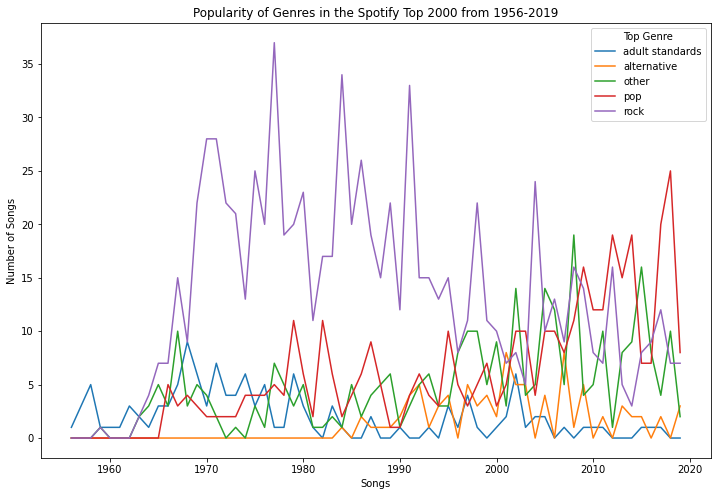

In [35]:
#We are only using the top 5 genres 
genreIndex = song_topGenres.index[0:5]
songs_TopGenres = songs[songs['Top Genre'].isin(genreIndex)].reset_index()
songs_TopGenres = pd.pivot_table(songs_TopGenres, index=['Year'],columns=['Top Genre'],fill_value=0,aggfunc=np.size).iloc[: , :5]
songs_TopGenres.columns = songs_TopGenres.columns.droplevel()                    

#Plot a line graph with the Top 5 Genres
songs_TopGenres.plot(lw=1.5)
plt.title('Popularity of Genres in the Spotify Top 2000 from 1956-2019')
plt.xlabel('Songs')
plt.ylabel('Number of Songs')


I've created a line graph for the 5 most prevalent genres in the dataset and the number of songs each genre has annually from 1956-2019. We can see over time that genres like album rock have become less popular and that popular songs have become more diverse in terms of genre. Different types of pop in particular have become more popular in the 21st century. Due to this genre diversification from rock, I can also expect to see shifts in song attributes such as length and BPM due to variation in typical ranges associated with other genres. 

When creating line graphs to examine shifts in song attribrutes, I decided to exclude songs before 1970 from the dataset because there weren't enough songs for an accurate representation in overall trend. 

In [36]:
#Change the values in song from string to integer
songs['Year'] = pd.to_numeric(songs['Year'], downcast='integer')
#Remove songs before 1970
songsNewer = songs[songs['Year']>1970]
songMeans = songsNewer.groupby('Year').mean().reset_index()
songMeans.head(5)

,Year,Index,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Acousticness,Speechiness,Popularity,Length(min)
0,1971,861.0,121.883721,51.279070,47.302326,-11.302326,13.953488,49.046512,39.418605,5.674419,63.046512,5.389147
1,1972,897.0,128.724138,52.379310,50.482759,-11.551724,21.620690,58.758621,39.896552,4.379310,62.620690,4.265517
2,1973,926.0,118.827586,50.068966,46.758621,-10.827586,16.758621,51.344828,38.482759,4.655172,65.241379,4.829310
3,1974,952.0,119.782609,48.043478,45.869565,-11.826087,22.652174,47.173913,51.913043,4.304348,59.434783,4.614493
4,1975,981.5,115.083333,54.166667,49.888889,-10.194444,21.694444,44.694444,37.000000,4.138889,59.500000,5.247222


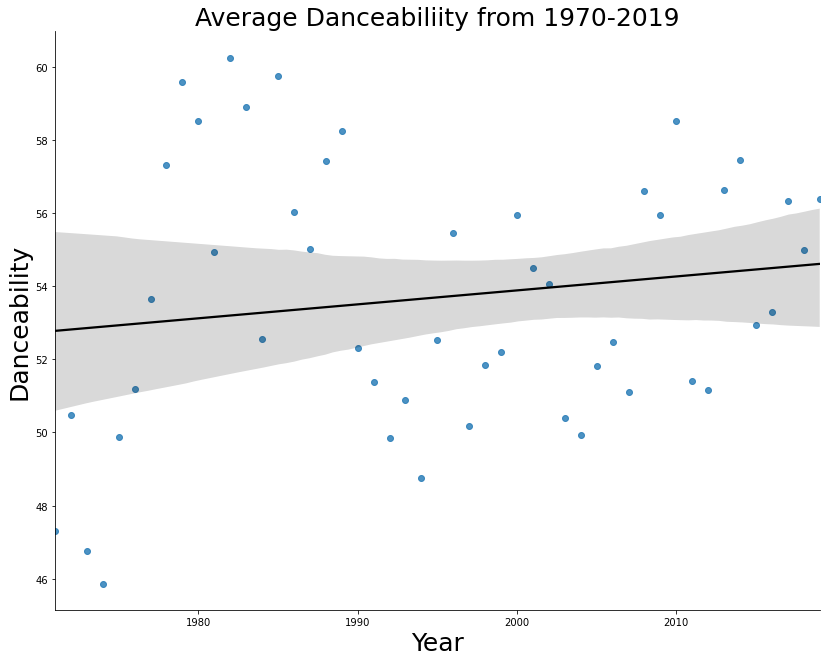

In [37]:
#Plots danceability from 1970-2019
sns.lmplot(x='Year',y='Danceability',data=songMeans,fit_reg=True, line_kws={'color': 'black'})
#songMeans.plot(x='Year',y='Danceability')
plt.title('Average Danceabiliity from 1970-2019', fontsize=25)
plt.xlabel('Year', fontsize=25)
plt.ylabel('Danceability', fontsize=25)
fig = plt.gcf()
fig.set_size_inches(12,9)

Overall, average danceablity increased from 1970-2019.

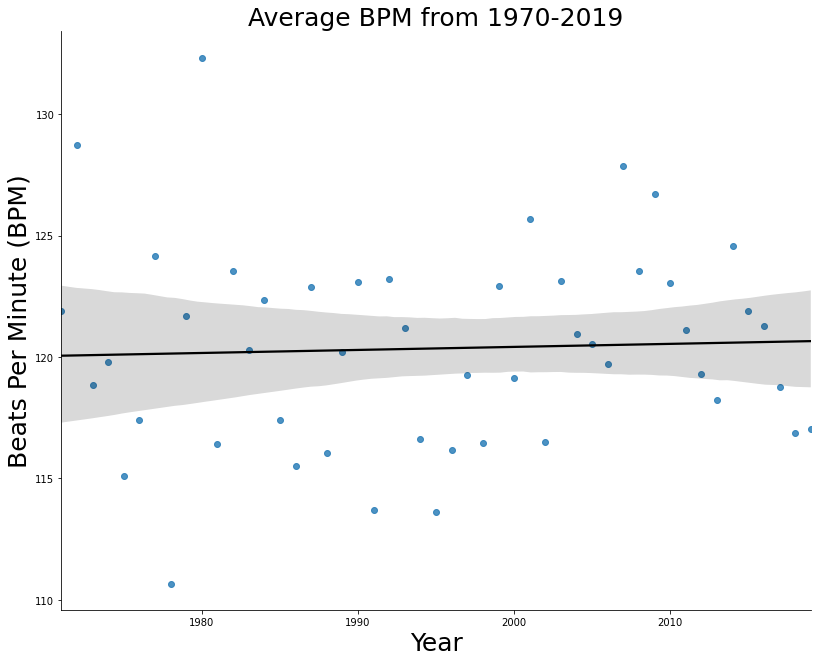

In [38]:
#Plots BPM from 1970-2019
sns.lmplot(x='Year',y='Beats Per Minute (BPM)',data=songMeans, fit_reg=True, line_kws={'color': 'black'})
#songMeans.plot(x='Year',y='Beats Per Minute (BPM)')
plt.title('Average BPM from 1970-2019', fontsize=25)
plt.xlabel('Year', fontsize=25)
plt.ylabel('Beats Per Minute (BPM)', fontsize=25)
fig = plt.gcf()
fig.set_size_inches(12,9)

BPM has stayed relatively consistent from 1970-2019; the average BPM tended to stay within a range of 115-125. 

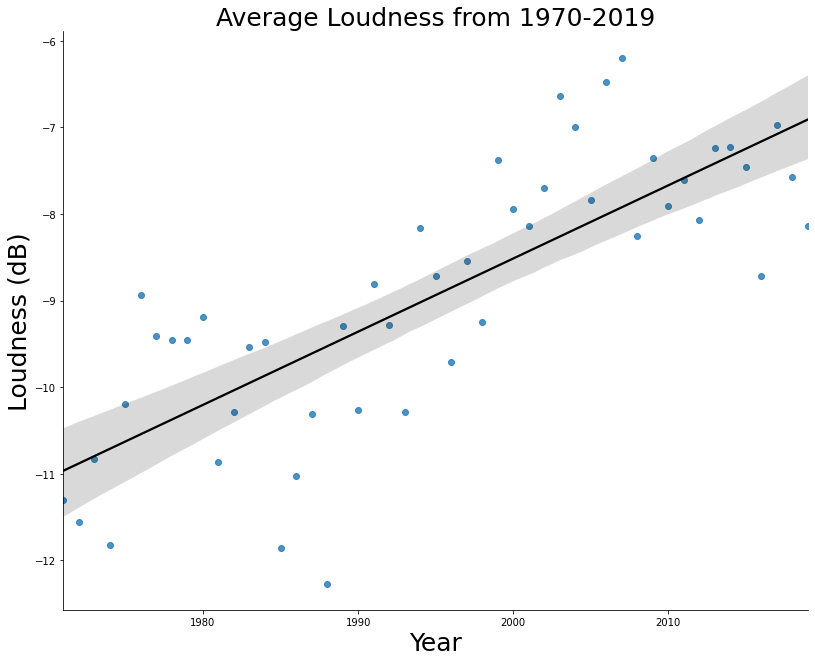

In [39]:
#Plots Loudness from 1970-2019
sns.lmplot(x='Year',y='Loudness (dB)',data=songMeans, fit_reg=True, line_kws={'color': 'black'})
#songMeans.plot(x='Year',y='Loudness (dB)')
plt.title('Average Loudness from 1970-2019', fontsize=25)
plt.xlabel('Year', fontsize=25)
plt.ylabel('Loudness (dB)', fontsize=25)
fig = plt.gcf()
fig.set_size_inches(12,9)

Overall, average loudness increased from 1956-2019. Because of the high positive correlation we discovered between loudness and energy, we can see that energy also tended to increase over time. 

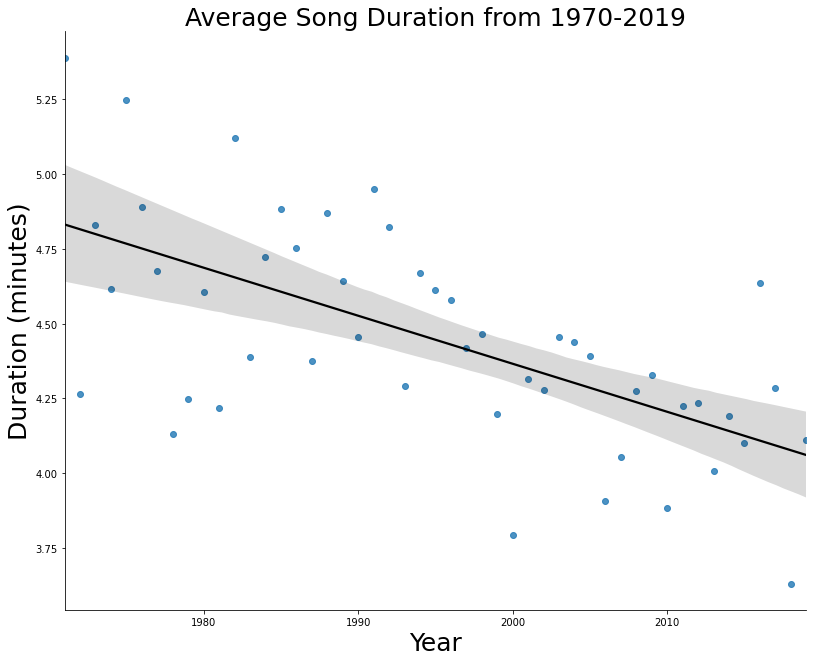

In [40]:
#Plots Song Duration from 1970-2019
sns.lmplot(x='Year',y='Length(min)',data=songMeans, fit_reg=True, line_kws={'color': 'black'})
#songMeans.plot(x='Year',y='Length(min)')
plt.title('Average Song Duration from 1970-2019', fontsize=25)
plt.xlabel('Year', fontsize=25)
plt.ylabel('Duration (minutes)', fontsize=25)
fig = plt.gcf()
fig.set_size_inches(12,9)

Overall, average song duration decreased from 1970-2019.

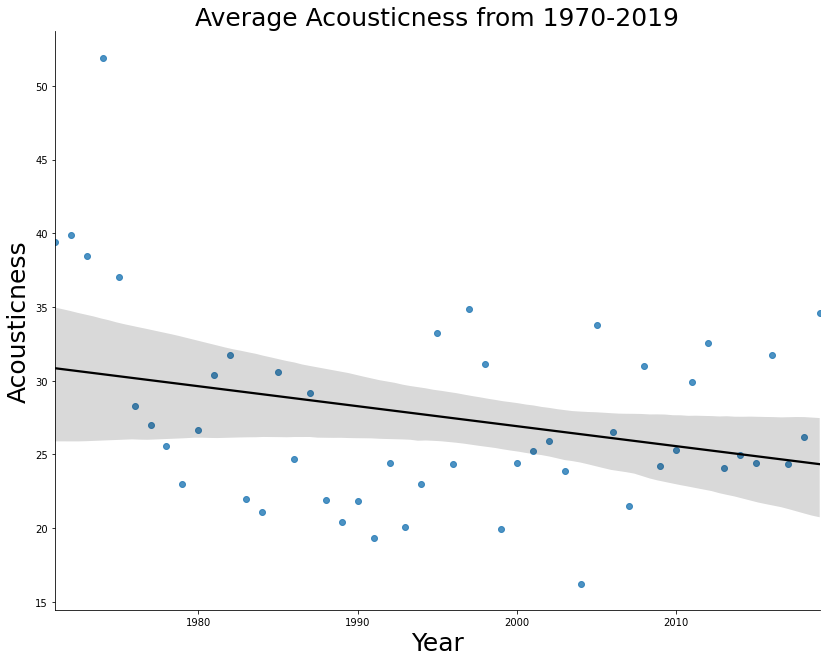

In [41]:
#Plots Song Duration from 1970-2019
sns.lmplot(x='Year',y='Acousticness',data=songMeans, fit_reg=True, line_kws={'color': 'black'})
#songMeans.plot(x='Year',y='Acousticness')
plt.title('Average Acousticness from 1970-2019', fontsize=25)
plt.xlabel('Year', fontsize=25)
plt.ylabel('Acousticness', fontsize=25)
fig = plt.gcf()
fig.set_size_inches(12,9)

Overall, average acousticness had a slight positive trend over time. 

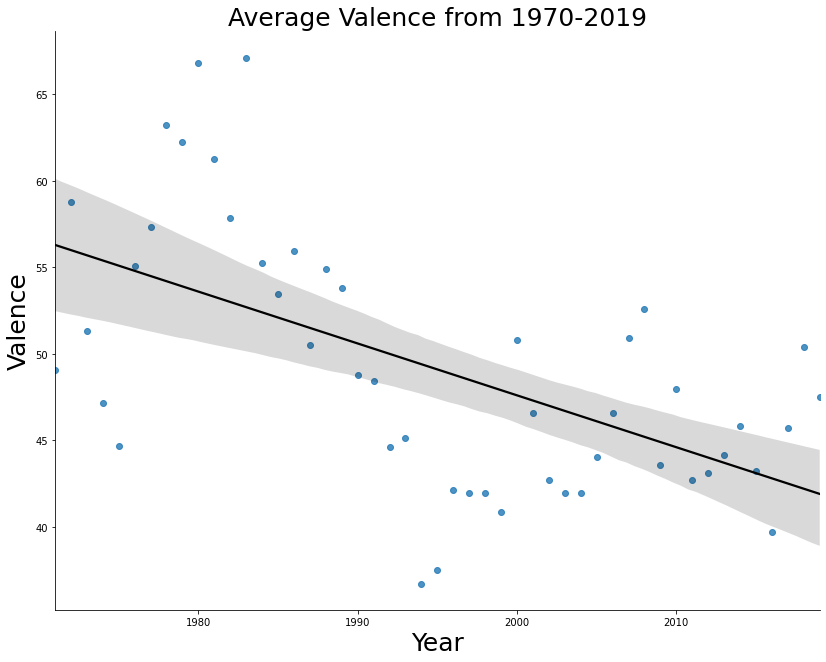

In [42]:
#Plots Song Valence from 1970-2019
sns.lmplot(x='Year',y='Valence',data=songMeans, fit_reg=True, line_kws={'color': 'black'})
#songMeans.plot(x='Year',y='Valence')
plt.title('Average Valence from 1970-2019', fontsize=25)
plt.xlabel('Year', fontsize=25)
plt.ylabel('Valence', fontsize=25)
fig = plt.gcf()
fig.set_size_inches(12,9)

I was then interested in seeing whether the trend in genre diversification or shared song attributes among popular songs came from any particular popular artists.  If there was a particular artists who had a large number of songs listed. in the dataset, this would have skewed the distribution for how genres and song attributes changed over time. 

In [43]:
artistsCount = songs.groupby('Artist').count().iloc[:,1]
artists = songs.groupby('Artist')['Top Genre'].apply(lambda x: list(np.unique(x))).to_frame()
artists['Song Count'] = artistsCount
artists = artists.sort_values(by='Song Count', ascending=False).reset_index()
artists.head(30)

,Artist,Top Genre,Song Count
0,Queen,[rock],37
1,The Beatles,[other],36
2,Coldplay,[other],27
3,U2,[rock],26
4,The Rolling Stones,[rock],24
5,Michael Jackson,[pop],23
6,Bruce Springsteen,[rock],23
7,ABBA,[pop],22
8,David Bowie,[rock],21
9,Fleetwood Mac,[rock],18


If we group the dataset by the artists, we can see that the 50 most popular artists tend to have create music within pop or rock subgenres. 

In [44]:
top50NumSongs = sum(artists.iloc[:50,2])
top50NumSongs

702

Roughly a 35% from the dataset came from the 50 most popular artists.

I then looked at song distribution when excluding the 50 artists with the most songs in the dataset. Doing so would show whether the top 50 artists had indeed skewed the distribution regarding genre and song attribute distribution. 

In [45]:
top50Artists = list(artists.iloc[:50,0])
top50Artists
notTop50Artists = songs[~songs['Artist'].isin(top50Artists)]
notTop50GenreCount = notTop50Artists['Top Genre'].value_counts().to_frame().reset_index()
notTop50GenreCount = notTop50GenreCount.rename(columns={'index':'Genre','Top Genre':'Song Count excluding Top 50 Artists'})
notTop50GenreCount = notTop50GenreCount.sort_values(by='Genre', ascending=True)
notTop50GenreCount

,Genre,Song Count excluding Top 50 Artists
3,adult standards,94
4,alternative,69
12,country,2
9,electronic,9
8,folk,19
10,funk,6
7,hip pop,27
5,indie,45
11,metal,6
2,other,211


However, when we remove songs from the 50 most popular artists and look at value counts for genres in the remainder of the dataset, we can see that that the distribution is still relatively similar and rock and pop are still the most popular genres.

In [46]:
genreComp = song_topGenres.to_frame().reset_index()
genreComp = genreComp.rename(columns={'index':'Genre','Top Genre':'Song Count'})
genreComp = genreComp.sort_values(by='Genre', ascending=True)
genreComp['Song Count excluding those from Top 50 Artists'] = notTop50GenreCount.iloc[:,1]
genreComp = genreComp.sort_values(by='Song Count', ascending = False)
#We can change the song count to a fraction of the total number of songs in that column
genreComp['Song Count'] = genreComp['Song Count'].div(2000)
genreComp['Song Count excluding those from Top 50 Artists'] = genreComp['Song Count excluding those from Top 50 Artists'].div(1298)
genreComp

,Genre,Song Count,Song Count excluding those from Top 50 Artists
0,rock,0.4285,0.378274
1,pop,0.1930,0.217257
2,other,0.1530,0.162558
3,adult standards,0.0615,0.072419
4,alternative,0.0445,0.053159
5,indie,0.0405,0.034669
6,soul,0.0225,0.023883
7,hip pop,0.0135,0.020801
8,metal,0.0115,0.014638
9,folk,0.0095,0.006934


I've created a bar graph that show genre distribution when including all songs in the datset vs excluding those from the top 50 artists. 

Text(0.5, 1.0, 'Genre Distribution of Songs')

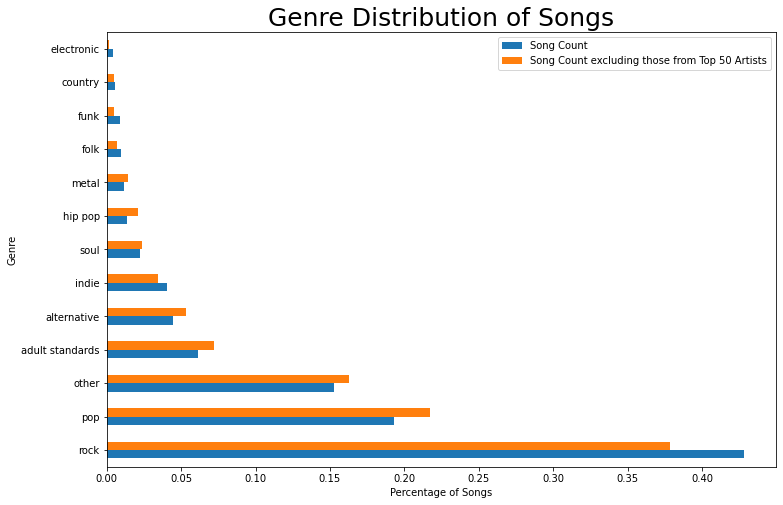

In [47]:
#Plot bar graph showing distributions with and excluding songs from the Top 50 Artists
genreComp.plot.barh(x='Genre',rot=0)
plt.xlabel('Percentage of Songs')
plt.title('Genre Distribution of Songs',fontsize=25)

I grouped the dataset by artist to try to remove skewing genre distribution and sorted by year to see shifts in genre. Over time, we can see evidence of genre diversification to include new and modernized types of music such as electropop. We can also see a shift from the most popular type of genre being from rock to pop. 

In [48]:
artistsMean = songs.groupby('Artist').mean()
artistsMean['Song Count'] = artistsCount
artistsMean = artistsMean.sort_values(by='Song Count', ascending=False).reset_index()
artistsMean['Top Genre'] = artists['Top Genre']
#artistsMean = artistsMean.sort_values(by='Year', ascending=True)
artistsMean.head(50)

,Artist,Index,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Acousticness,Speechiness,Popularity,Length(min),Song Count,Top Genre
0,Queen,1275.432432,1984.837838,103.297297,62.729730,50.189189,-7.297297,22.972973,41.297297,26.540541,5.918919,56.351351,4.178378,37,[rock]
1,The Beatles,1558.416667,1972.083333,119.222222,49.583333,50.027778,-9.805556,21.027778,57.583333,39.055556,4.277778,68.083333,3.076389,36,[other]
2,Coldplay,364.740741,2007.666667,127.000000,62.000000,46.740741,-7.296296,17.296296,24.185185,16.740741,3.629630,69.925926,4.579630,27,[other]
3,U2,1012.384615,1993.307692,127.000000,69.884615,47.346154,-8.307692,24.576923,45.653846,8.961538,3.884615,56.769231,4.563462,26,[rock]
4,The Rolling Stones,1434.416667,1972.541667,118.208333,66.291667,55.291667,-8.416667,17.166667,62.166667,39.416667,5.375000,62.333333,4.248611,24,[rock]
5,Michael Jackson,1159.434783,1991.086957,114.826087,70.130435,74.739130,-6.913043,18.652174,62.304348,25.869565,5.869565,65.695652,4.694928,23,[pop]
6,Bruce Springsteen,1085.391304,1986.956522,119.695652,65.391304,52.000000,-9.086957,22.608696,59.347826,21.086957,4.304348,59.913043,4.463043,23,[rock]
7,ABBA,1110.000000,1978.590909,117.863636,64.045455,59.090909,-8.500000,20.409091,67.727273,36.045455,3.454545,53.909091,4.260606,22,[pop]
8,David Bowie,1001.428571,1981.142857,118.428571,61.000000,57.047619,-10.809524,16.380952,57.333333,20.476190,4.190476,62.428571,4.876984,21,[rock]
9,Fleetwood Mac,1368.333333,1980.277778,135.111111,49.055556,58.000000,-13.222222,15.277778,61.000000,24.666667,4.388889,60.166667,3.785185,18,[rock]


Likewise, if we compare song attributes when excluding and including songs from the top 50 artists, we can see that there is little difference between attributes. Therefore, the inclusion of having multiple songs from one artist in the dataset doesn't skew distributions that much. 

Text(0.5, 1.0, 'Song Attributes including and excluding Songs from the Top 50 Artists')

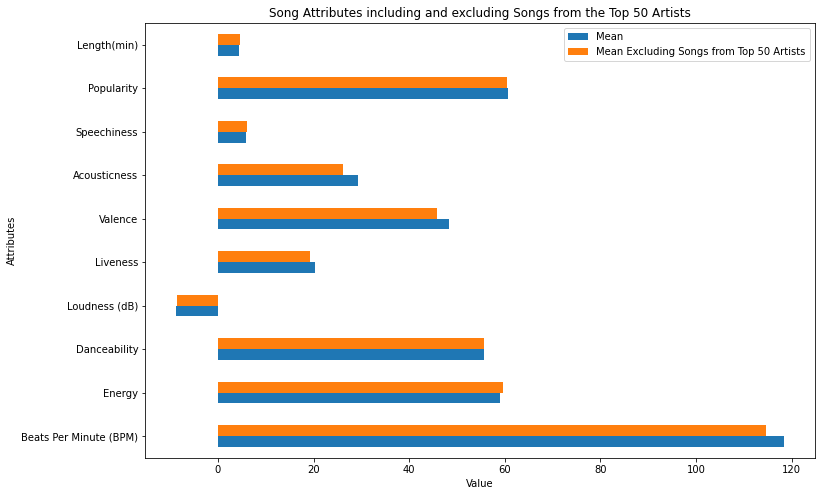

In [49]:
meanIncludingTop50Artists = songs.groupby('Top Genre').mean().reset_index(0)
meanIncludingTop50Artists = meanIncludingTop50Artists.mean().to_frame().iloc[2:,:]
#Remove songs from those created by the top 50 artists
meanExcludingTop50Artists = songs[~songs['Artist'].isin(top50Artists)]
meanExcludingTop50Artists = meanExcludingTop50Artists.groupby('Top Genre').mean().reset_index(0)
meanExcludingTop50Artists = meanExcludingTop50Artists.mean().to_frame().iloc[2:,:]

#Create a table with means from meanExcludingTop50Artists and meanIncludingTop50Artists
attributes = meanIncludingTop50Artists[0].index
meanExcludingTop50Artists = meanExcludingTop50Artists[0].values
meanIncludingTop50Artists = meanIncludingTop50Artists[0].values
attributeComp = pd.DataFrame(data={'Attributes': attributes, 'Mean': meanIncludingTop50Artists,
                                   'Mean Excluding Songs from Top 50 Artists': meanExcludingTop50Artists})

#Plot a bar graph comparing attributes when including and excluding songs from the top 50 artists
attributeComp.plot.barh(rot=0,x='Attributes')
plt.xlabel('Value')
plt.title('Song Attributes including and excluding Songs from the Top 50 Artists')


# E. Conclusion

**1 and 2)** If we were to predict the popularity of a song based on its attributes without the context of time, we would be able to make an better approximation based on whether it had rock or pop as a genre. The genre would have also influenced other attributes that we could use to gauge the song's popularity such as whether the BPM was within 100-140 or whether it had a length around 4.15 minutes. 

However, we've learned through our analysis that there has been an increase in genre diversification into the 21st century. The presence of genre diversification has in turn led to more variation for typical ranges in song attributions, particularly danceability, length, loudness, and energy. There's also been a shift of the most popular musical genre from rock to pop from the mid 20ths century to today. Therefore, if we were to predict the popularity of a song released in the modern day, the song would likely be more popular if it were a pop song as opposed to rock. 

**3 and 4)** Although there is a possibility that we there are reoccuring artists that may have skewed genre and attribute, we compared the dataset when including and excluding these artist and found minimal difference in genre distribution and attribute means for different genres. We can therefore conclude that our dataset when including songs from the top 50 artists was representative of all 2000 songs in the dataset. 

Different genres have different means and typical ranges. As genres of popular songs have become more diversified, this has led to a shift in the mean of attributes. For example, we learned that danceability and loudness has increased over time while song duration has decreased over time. 


#Works Cited

Biss, Madars. “Rhythm Tips for Identifying Music Genres by Ear.” Musical U, Easy Ear Training Ltd., 14 Feb. 2017, 	www.musical-u.com/learn/rhythm-tips-for-identifying-music-genres-by-ear/.



Esty, Thomas. “Trends Over Time - Music Popularity Data Analysis.”Google Sites, sites.google.com/site/musicpopularitydataanalysis/trends-over-time.

Fadelli, Ingrid. “Using Spotify Data to Predict What Songs Will Be Hits.”Tech Xplore - Technology and Engineering News, Tech Xplore, 9 Sept. 2019,
	techxplore.com/news/2019-09-spotify-songs.html.

Hinkes-Jones, Llewellyn. “The Real Reason Music's Gotten So Loud.”The Atlantic, Atlantic Media Company, 25 Nov. 2013, 	www.theatlantic.com/entertainment/archive/2013/11/the-real-reason-musics-gotten-so-loud/281707/.

Iqbal, Mansoor. “Spotify Revenue and Usage Statistics (2021).”Business of Apps, Business of Apps, 2 Apr. 2021, www.businessofapps.com/data/spotify-statistics/.

Przybyla, Matt. “Predicting Spotify Song Popularity.”Medium, Towards Data Science, 3 Feb. 2021, towardsdatascience.com/predicting-spotify-song-popularity-49d000f254c7.

“Shareholder-Letter-Q4-2019.”Financials, Spotify AB, 2 Feb. 2020, investors.spotify.com/financials/default.aspx.

Singh, Sumat.Spotify - All Time Top 2000s Mega Dataset, Kaggle, 4 Feb. 2020, www.kaggle.com/iamsumat/spotify-top-2000s-mega-dataset.

Stuart. “Pop Music Is Louder, Less Acoustic and More Energetic than in the 1950s.”The Guardian, Guardian News and Media, 25 Nov. 2013, 	www.theguardian.com/technology/2013/nov/25/pop-music-louder-less-acoustic.
